# Welcome to the geopandas homework! 
In this homework you will learn more about how to use geopandas to work with geospatial data.

In [1]:
import urllib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


### Some setup

In [2]:
az = gpd.read_file(
    './data/arizona_shapefile/tl_2016_04_cousub.shp'
)
gages = gpd.read_file(
    './data/gagesii_shapefile/gagesII_9322_sept30_2011.shp'
)
huc8 = gpd.read_file(
    './data/arizona_huc8_shapefile/WBDHU8.shp'
)

# Step 1: 
Put the `gages` geodataframe onto the same CRS as the `az` geodataframe

In [3]:
# TODO: Your code here
gages = gages.to_crs(az.crs)

# Step 2: 
The various polygons in the Arizona shapefile
are just census designated boundaries, and don't really
mean anything as far as the hydrology of Arizona. So,
let's get rid of them. In GIS-language this is called
"dissolving" the polygons. 

Your task here is to make the `az` variable be a 
geodataframe with only a single geometry.


<Axes: >

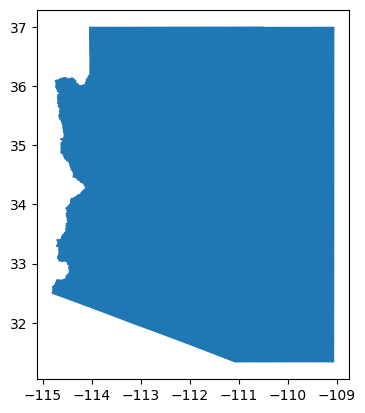

In [4]:
# TODO: Your code here
az.head()
az = az.dissolve()
az.plot()


# Step 3: 
Pull out only the gages in Arizona from 
the `gages` dataset, save this as `az_gages`
In GIS-language this is called "clipping" 


In [5]:
# TODO: Your code here
az_gages = gages.clip(az)


# Step 4: 
Make a plot showing Arizona in "lightgrey"
and the locations of the gages in Arizona plotted as
"crimson" colored points.

NOTE: Calling `.plot` on a geodataframe will return 
      a new axis object which can be passed to 
      subsequent plot commands 

NOTE: You might try setting `markersize=3` or similar
      when you are plotting the gages, so that it's 
      easier to see them.


Text(0.5, 1.0, 'Gages II data in Arizona')

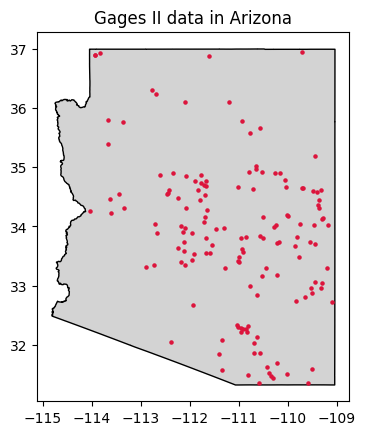

In [6]:
# TODO: Your code here
ax = az.plot(color='lightgrey', edgecolor='black')
az_gages.plot(ax=ax, color='crimson', markersize=5)
plt.title('Gages II data in Arizona')

# Step 5: 
I also gave you a dataset of watershed
boundaries (called HUCs, for hydrologic unit code).
I gave you the "level 8" units, where a smaller unit
level means a larger spatial aggregation, and a larger
code is more fine-scaled. This is stored in the variable 
`huc8`. 

Plot the huc8 boundaries in "lightgrey", then plot 
the outline of Arizona over the top of it. Finally
plot the gages contained in Arizona again as "crimson"
points.

NOTE: To get a transparent "face color" for the Arizona
      outline set `color="none"` and `edgecolor="black"`
      inside of your second plot command.


,STAID,STANAME,CLASS,AGGECOREGI,DRAIN_SQKM,HUC02,LAT_GAGE,LNG_GAGE,STATE,HCDN_2009,ACTIVE09,FLYRS1900,FLYRS1950,FLYRS1990,geometry
7067,09480000,"SANTA CRUZ RIVER NEAR LOCHIEL, AZ.",Ref,WestXeric,213.3810,15,31.355378,-110.589526,AZ,yes,yes,60.0,60.0,20.0,POINT (-110.58953 31.35538)
7060,09470750,"RAMSEY CANYON NR SIERRA VISTA, AZ.",Ref,WestXeric,10.8090,15,31.446667,-110.305833,AZ,None,yes,9.0,9.0,9.0,POINT (-110.30583 31.44667)
7061,09470800,"GARDEN CANYON NEAR FORT HUACHUCA, AZ.",Ref,WestXeric,22.1517,15,31.472875,-110.347859,AZ,None,yes,20.0,20.0,15.0,POINT (-110.34786 31.47288)
7068,09481500,"SONOITA CREEK NEAR PATAGONIA, ARIZ.",Non-ref,WestXeric,540.3690,15,31.499816,-110.818142,AZ,None,None,40.0,23.0,0.0,POINT (-110.81814 31.49982)
7059,09470700,"BANNING CREEK NEAR BISBEE, AZ.",Non-ref,WestXeric,22.9662,15,31.503472,-110.005278,AZ,None,yes,8.0,8.0,8.0,POINT (-110.00528 31.50347)


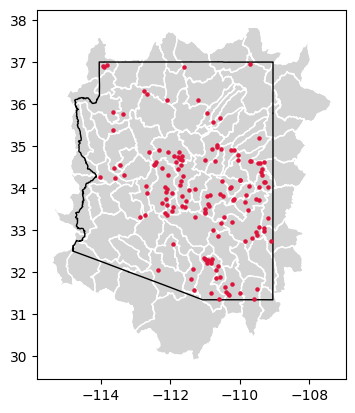

In [7]:
# TODO: Your code here
ax_huc8 = huc8.plot(color='lightgrey', edgecolor='white')
az.plot(ax = ax_huc8, edgecolor='black', color='none')
az_gages.plot(ax=ax_huc8, color='crimson', markersize=5)
az_gages.head()

# Step 6:  
For this step, I want you to plot the location
of the Verde river gage that we've been using as an example. 

To do this, first find the row where # the `'STANAME'` 
column of `az_gages` is equal to # the `name` variable. 
Then use that information to select out only the Verde
river gage into the variable `verde_gage`.

The resulting plot should put a big star where the 
gage location is. All other gages in Arizona will
still appear as dots.

         STAID                          STANAME    CLASS AGGECOREGI  \
7121  09506000  VERDE RIVER NEAR CAMP VERDE, AZ  Non-ref   WestMnts   

      DRAIN_SQKM HUC02   LAT_GAGE    LNG_GAGE STATE HCDN_2009 ACTIVE09  \
7121    12097.16    15  34.448361 -111.789871    AZ      None      yes   

      FLYRS1900  FLYRS1950  FLYRS1990                     geometry  
7121       32.0       21.0       20.0  POINT (-111.78987 34.44836)  


<Axes: >

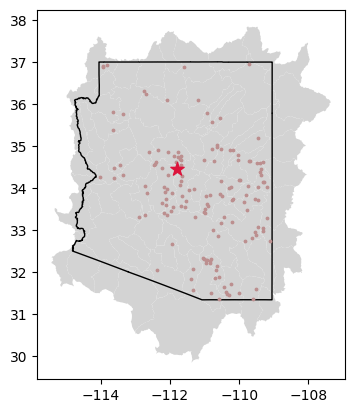

In [8]:
name = "VERDE RIVER NEAR CAMP VERDE, AZ"
# TODO: Your code here

bool_verde = az_gages['STANAME'] == name
verde_gage = az_gages[bool_verde]
print(verde_gage)

# Plotting code, you should not have to modify
ax = huc8.plot(color='lightgrey')
az.plot(ax=ax, edgecolor='black', color="none")
az_gages.plot(ax=ax, color='rosybrown', markersize=3)
verde_gage.plot(ax=ax, color='crimson', marker='*', markersize=100)

# Step 7: 
Now let's combine this with our knowledge
about downloading streamflow data from USGS!

I've provided you with the functions for downloading
data that we've used in the past. You don't have to
do anything for this step.


In [9]:

def create_usgs_url(site_no, begin_date, end_date):
    return (
        f'https://waterdata.usgs.gov/nwis/dv?'
        f'cb_00060=on&format=rdb&referred_module=sw&'
        f'site_no={site_no}&'
        f'begin_date={begin_date}&'
        f'end_date={end_date}'
    )

def open_usgs_data(site, begin_date, end_date):
    url = create_usgs_url((site), begin_date, end_date)
    response = urllib.request.urlopen(url)
    df = pd.read_table(
        response,
        comment='#',
        skipfooter=1,
        delim_whitespace=True,
        names=['agency', 'site', 'date', 'streamflow', 'quality_flag'],
        index_col=2,
        parse_dates=True
    ).iloc[2:]

    # Now convert the streamflow data to floats and
    # the index to datetimes. When processing raw data
    # it's common to have to do some extra postprocessing
    df['streamflow'] = df['streamflow'].astype(np.float64)
    df.index = pd.DatetimeIndex(df.index)
    return df


# Step 8: 
Now pull out the site id from the `verde_gage`
variable. This is contained in the `'STAID'` column, which
stands for "Station ID". Put this into the variable 
`station_id`

Success on this one should just print out the first 5
streamflow values for the Verde river near Campe Verde.


In [15]:
begin_date = '2012-10-01'
end_date = '2024-09-30'

# TODO: Your code here
station_id = verde_gage['STAID']

site = station_id.values[0]
verde_df = open_usgs_data(site, begin_date, end_date)
verde_df.head()

/tmp/ipykernel_1206/2568470865.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(
/tmp/ipykernel_1206/2568470865.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_table(
/tmp/ipykernel_1206/2568470865.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_table(


,agency,site,streamflow,quality_flag
date,,,,
2012-10-01,USGS,09506000,76.7,A
2012-10-02,USGS,09506000,80.2,A
2012-10-03,USGS,09506000,71.7,A
2012-10-04,USGS,09506000,69.9,A
2012-10-05,USGS,09506000,72.1,A


# Step 9: 
Now try pulling out a different gage location
using it's name and download the USGS data for the 
same time period as the `verde_df`. Put this one in
`other_gage_df`. Compare the two location's mean
streamflows by printing them out.

In [18]:
# TODO: Your code here
other_name = "SANTA CRUZ RIVER NEAR LOCHIEL, AZ."
bool_santacruz = az_gages['STANAME'] == other_name
santacruz_gage = az_gages[bool_santacruz]


sc_station_id = santacruz_gage['STAID']

sc_site = sc_station_id.values[0]
santacruz_df = open_usgs_data(sc_site, begin_date, end_date)
santacruz_df.head()
#print(verde_df.head())


/tmp/ipykernel_1206/2568470865.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(
/tmp/ipykernel_1206/2568470865.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_table(
/tmp/ipykernel_1206/2568470865.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_table(


,agency,site,streamflow,quality_flag
date,,,,
2012-10-01,USGS,09480000,0.11,A
2012-10-02,USGS,09480000,0.11,A
2012-10-03,USGS,09480000,0.10,A
2012-10-04,USGS,09480000,0.10,A
2012-10-05,USGS,09480000,0.11,A


# Step 10: 
From our original plots of the spatial
distribution of gages it was clear that surface
water access in Arizona is uneven. For this 
exercise I want you to count the number of gages
in Arizona for each of the HUC8 boundaries. 

To do this you'll have to iterate over the `huc8`
variable using the `huc8.iterrows()` function, which
basically loops over each row of the dataframe. 
Instead of giving you just the row, it also gives 
you the row column, which is why I have put `i, huc`
in the for loop. `i` will keep track of the row number
and `huc` will be the actual data from the row.

I've got you started on the loop, but your next step
is to "clip" from `az_gages` the "geometry" from the 
`huc`. Then, count how many gages are in this selection
by using the `len` function. Append the result of this
to the `number_gages_in_huc` list.

Finally, add a new column to the `huc8` dataframe called
`'number_gauges'` and set it equal to the `number_gages_in_huc`


In [ ]:
number_gages_in_huc = []
for i, huc in huc8.iterrows():
    clipped_gages = az_gages.clip(huc.geometry) 
    n_gages = len(clipped_gages)    
    number_gages_in_huc.append(n_gages)

huc8['number_gauges'] = number_gages_in_huc
huc8.head() 

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,huc8,name,shape_Leng,shape_Area,ObjectID,geometry,number_gauges
0,{21A6AE9C-8C85-4578-AE5A-368093D0E9E5},None,None,None,None,2012-06-11,None,1587400.21,6423.99,"AZ,MX",15050202,Upper San Pedro,5.472283,0.610343,1,"POLYGON ((-110.06881 32.31212, -110.06861 32.3...",6
1,{568424D6-AAD7-4741-BEF8-CC7DFC5DDDB0},None,None,None,None,2012-06-11,None,3060043.61,12383.57,"AZ,MX",15080102,Rio Sonoyta,6.229830,1.175052,2,"POLYGON ((-113.32971 32.096, -113.32706 32.095...",0
2,{D1677351-E56E-4D3E-83F2-6FCBC192BA92},None,None,None,None,2012-06-11,None,2927136.55,11845.71,"AZ,NM",14080106,Chaco,6.789479,1.185591,3,"POLYGON ((-108.63131 36.76393, -108.6308 36.76...",0
3,{235091EF-6669-4A64-BA91-64627FEDEA28},None,None,None,None,2012-06-11,None,1446077.40,5852.07,"AZ,NM",15020003,Carrizo Wash,4.734427,0.573512,4,"POLYGON ((-108.97939 34.72464, -108.97889 34.7...",1
4,{89233D54-146D-4110-8DE8-516DD7B99C2E},None,None,None,None,2012-06-11,None,1310977.35,5305.34,"AZ,NM",15040002,Upper Gila-Mangas,4.442042,0.510900,5,"POLYGON ((-108.6869 33.27176, -108.68644 33.27...",2


# Step 11: 
Finally, plot the number of gages in
each HUC - and don't forget to set `add_legend=True`!
Use the colormap "Blues", and also plot the Arizona
outline on top


Text(0.5, 1.0, 'No. of gauges in Arizona HUC8 basins')

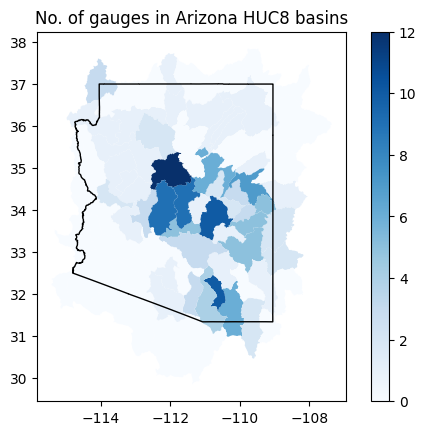

In [24]:
# TODO: Your code here
ax_numgages = huc8.plot(column='number_gauges', cmap = 'Blues', legend=True)
az.plot(ax=ax_numgages, edgecolor='black', color="none")
plt.title('No. of gauges in Arizona HUC8 basins')

# CONGRATULATIONS, you're finished!